# Unsupervised Learning –Clustering
    1) K-means,K-means++
    2) Hierarchical Method


In [1]:
#創立簡易的dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def plot_scatter(X,  color='k', alpha=0.6): #將資料分群
    #if use color index , the index must be between 0 and 1    
    return plt.scatter(X[:, 0],
                       X[:, 1],
                       c=color,
                       alpha=alpha,
                       edgecolor='k')    


## Genearte sample data and visualiztion

In [6]:
n1=5
n2=5
# cluster 
x1 = np.random.normal(60,10, n1)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5,n1)
C1=np.array(list(zip(x1,y1))) #組合起來ˊ
# cluster 
x2 = np.random.normal(30,10,n2)
y2 = np.random.normal(5,0.5,n2)
C2=np.array(list(zip(x2,y2)))

X_train = np.concatenate((C1,C2))

print(np.mean(C1,axis=0))
print(np.mean(C2,axis=0))

[62.42675755  4.85509208]
[35.14566581  5.24346464]


In [7]:
X_train #上c1，下c2

array([[68.64135582,  4.79309696],
       [44.82577149,  5.92723229],
       [76.80937672,  5.67632619],
       [56.36042885,  3.69224559],
       [65.49685488,  4.18655935],
       [36.09697043,  5.5047679 ],
       [42.25818193,  5.45242912],
       [28.42857602,  5.56917809],
       [35.28329882,  4.97654057],
       [33.66130186,  4.71440751]])

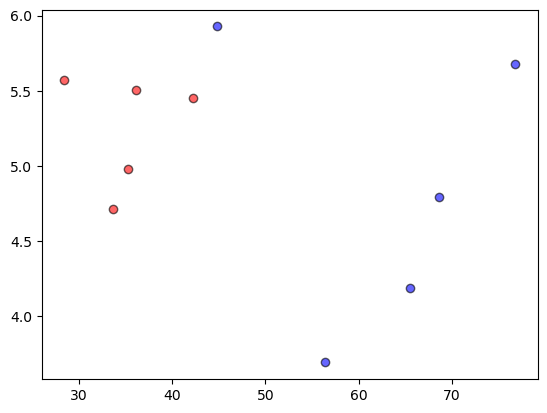

In [9]:
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.show()

In [10]:
X_train

array([[68.64135582,  4.79309696],
       [44.82577149,  5.92723229],
       [76.80937672,  5.67632619],
       [56.36042885,  3.69224559],
       [65.49685488,  4.18655935],
       [36.09697043,  5.5047679 ],
       [42.25818193,  5.45242912],
       [28.42857602,  5.56917809],
       [35.28329882,  4.97654057],
       [33.66130186,  4.71440751]])

In [11]:
X_train.shape

(10, 2)

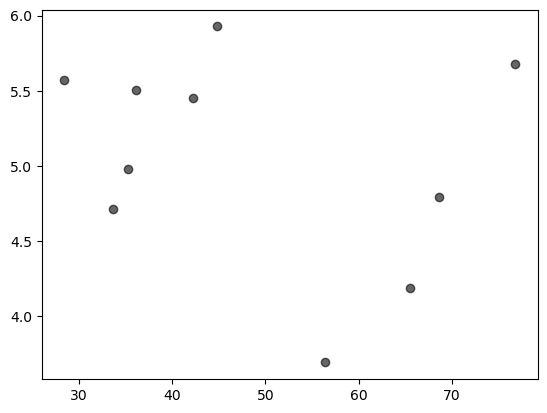

In [12]:
plot_scatter(X_train) #希望可以分成和原始dataset一樣
plt.show()

In [13]:
print('mean:',np.mean(X_train,axis=0))
print('std:',np.std(X_train,axis=0))

mean: [48.78621168  5.04927836]
std: [16.00306494  0.67625212]


# K-means algorithm
![](images/kmeans.png)
```    
    init : {‘k-means++’, ‘random’ or an ndarray} Method for initialization, defaults to ‘k-means++’:
    ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    ‘random’: choose k observations (rows) at random from data for the initial centroids.
    If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.
```    


In [14]:
kmeans = KMeans(init='random',n_clusters=2).fit(X_train)
kmeans

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=2)

In [15]:
kmeans.predict([[80, 0], [100, 3]])

array([0, 0])

In [16]:
kmeans.predict([[28, 5]])

array([1])

In [19]:
kmeans.predict(X_train) #沒正確答案

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [20]:
kmeans.cluster_centers_

array([[66.82700407,  4.58705702],
       [36.75901676,  5.35742591]])

In [21]:
X_train

array([[68.64135582,  4.79309696],
       [44.82577149,  5.92723229],
       [76.80937672,  5.67632619],
       [56.36042885,  3.69224559],
       [65.49685488,  4.18655935],
       [36.09697043,  5.5047679 ],
       [42.25818193,  5.45242912],
       [28.42857602,  5.56917809],
       [35.28329882,  4.97654057],
       [33.66130186,  4.71440751]])

In [22]:
kmeans.labels_

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1])

##    Plot Scatter
    1. 將資料點繪製成scatter圖. 請依據K-means分群後的結果來給予不同cluster有不同的顏色
       (cluster數非固定值)
    2. 將K-means中心點資料點也繪製上去並有較大圖樣

In [23]:
kmeans.predict(X_train)

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1])

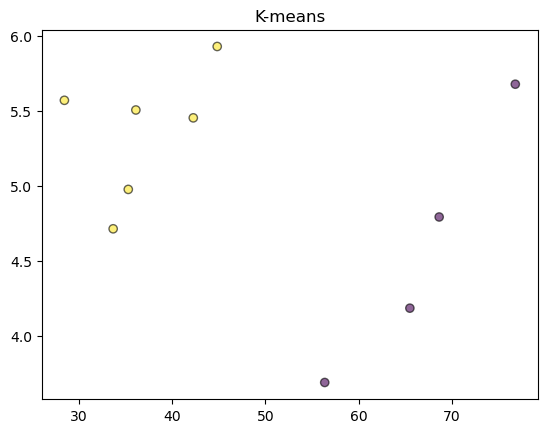

In [24]:
plot_scatter(X_train,kmeans.predict(X_train))
plt.title("K-means")
plt.show()

In [25]:
kmeans.cluster_centers_

array([[66.82700407,  4.58705702],
       [36.75901676,  5.35742591]])

In [124]:
kmeans.cluster_centers_[:,1]

array([5.01285234, 5.22432134])

In [125]:
kmeans.predict(X_train)

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1])

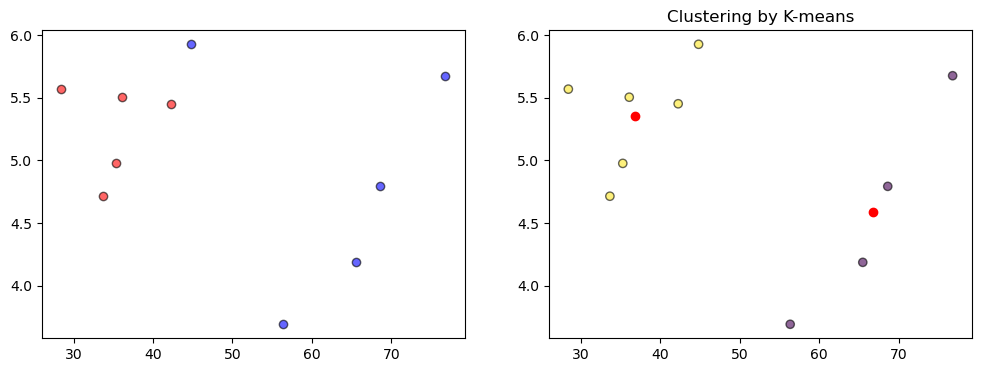

In [33]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.subplot(122)
plot_scatter(X_train,color=kmeans.predict(X_train))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')
plt.title("Clustering by K-means")
plt.show()


## Agglomerative algorithm
    1) linkage : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)
    
    2.) affinity : string or callable, default: “euclidean”
    Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

In [34]:
from sklearn.cluster import AgglomerativeClustering #linkage 群集之間，affinity 點跟點之間
import numpy as np

In [35]:
acv = AgglomerativeClustering(n_clusters=2,linkage='single').fit(X_train)
acv

AgglomerativeClustering(linkage='single')

In [36]:
cluster_labels=acv.fit_predict(X_train)
cluster_labels

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

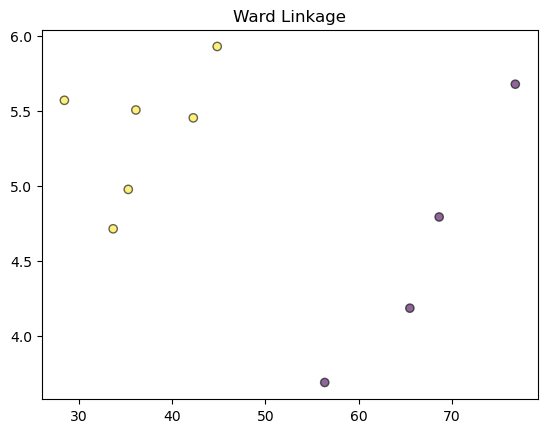

In [37]:
plot_scatter(X_train, acv.fit_predict(X_train))
plt.title("Ward Linkage")
plt.show()

In [38]:
X_train

array([[68.64135582,  4.79309696],
       [44.82577149,  5.92723229],
       [76.80937672,  5.67632619],
       [56.36042885,  3.69224559],
       [65.49685488,  4.18655935],
       [36.09697043,  5.5047679 ],
       [42.25818193,  5.45242912],
       [28.42857602,  5.56917809],
       [35.28329882,  4.97654057],
       [33.66130186,  4.71440751]])

## distance matrix

In [39]:
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_circles,make_blobs
D = np.round(pairwise_distances(X_train),1) 
D

array([[ 0. , 23.8,  8.2, 12.3,  3.2, 32.6, 26.4, 40.2, 33.4, 35. ],
       [23.8,  0. , 32. , 11.7, 20.7,  8.7,  2.6, 16.4,  9.6, 11.2],
       [ 8.2, 32. ,  0. , 20.5, 11.4, 40.7, 34.6, 48.4, 41.5, 43.2],
       [12.3, 11.7, 20.5,  0. ,  9.1, 20.3, 14.2, 28. , 21.1, 22.7],
       [ 3.2, 20.7, 11.4,  9.1,  0. , 29.4, 23.3, 37.1, 30.2, 31.8],
       [32.6,  8.7, 40.7, 20.3, 29.4,  0. ,  6.2,  7.7,  1. ,  2.6],
       [26.4,  2.6, 34.6, 14.2, 23.3,  6.2,  0. , 13.8,  7. ,  8.6],
       [40.2, 16.4, 48.4, 28. , 37.1,  7.7, 13.8,  0. ,  6.9,  5.3],
       [33.4,  9.6, 41.5, 21.1, 30.2,  1. ,  7. ,  6.9,  0. ,  1.6],
       [35. , 11.2, 43.2, 22.7, 31.8,  2.6,  8.6,  5.3,  1.6,  0. ]])

In [40]:
D.shape[0]

10

In [41]:
def min_dist(D):
    minimum=10000  
    min_x=0
    min_y=0
    for i in range(D.shape[0]):
        for j in range(i):           
            if D[i][j]<minimum:         
                minimum=D[i][j]
                min_x=i
                min_y=j
                #print(i,j,D[i][j])
                
    return (min_x,min_y),minimum

In [42]:
min_dist(D) #8和6的距離最相近

((8, 5), 1.0)

## plot dendrogram (樹狀圖)

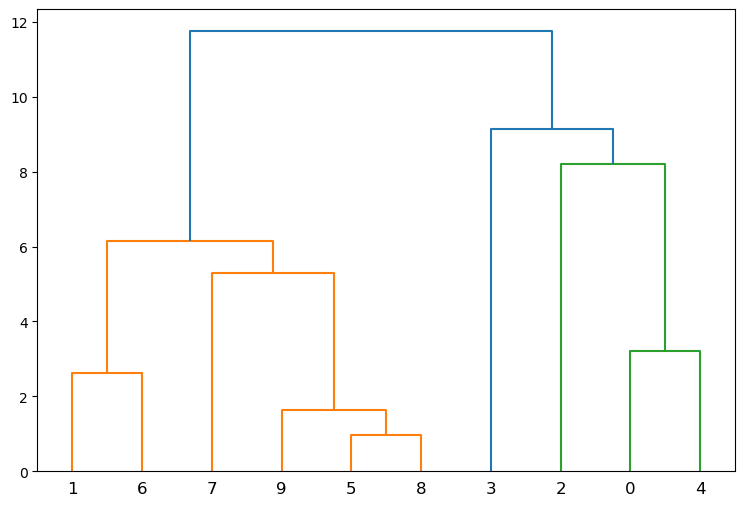

In [43]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))

def plot_dendrogram(x, method='ward'):
    Z = linkage(x, method)
    dendrogram(Z)

plot_dendrogram(X_train,'single')
plt.show()
#誰和誰相近，可以看出分幾群

## Comparing different hierarchical linkage methods

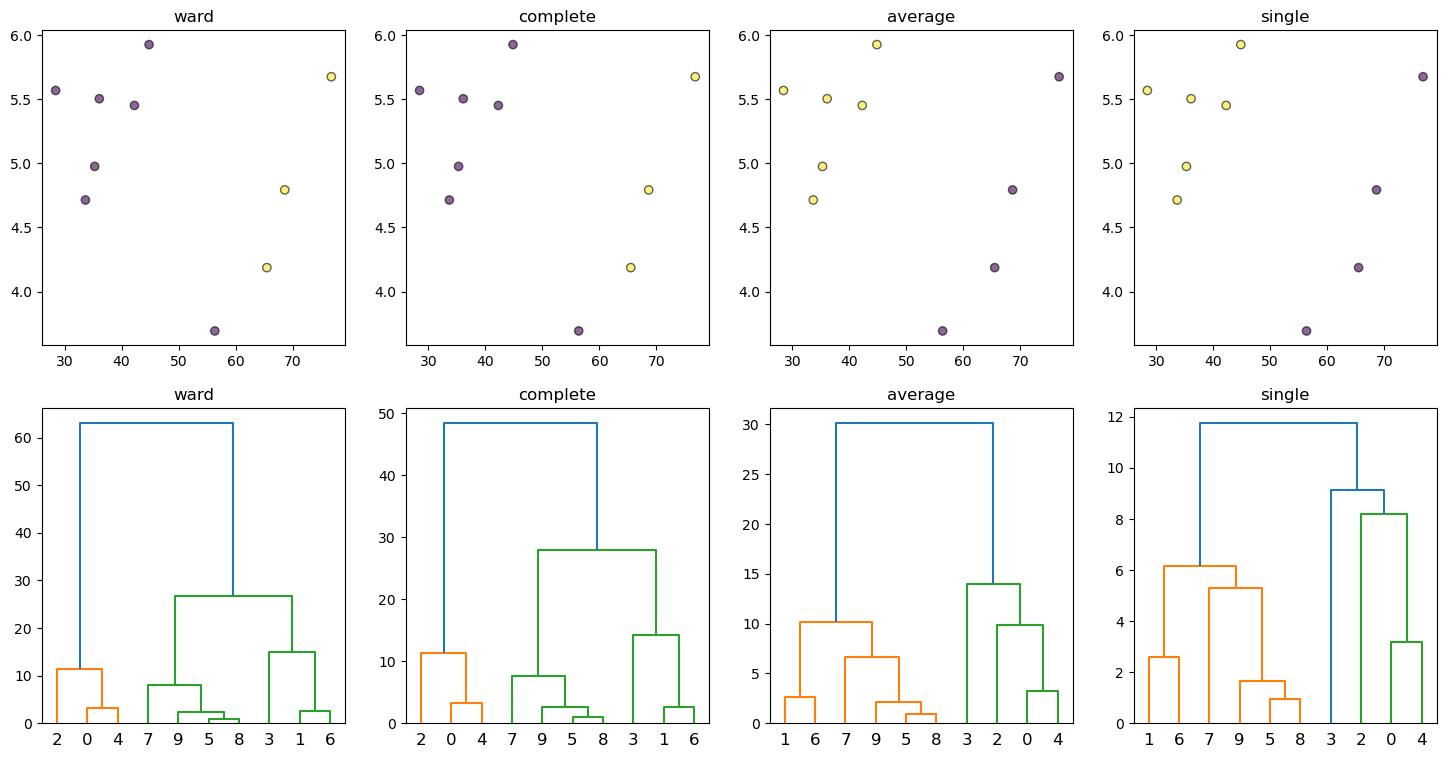

In [45]:

def compare_linkage(X):
    
    plt.figure(figsize=(18, 9))
    linktype=['ward', 'complete', 'average', 'single']

    for i,link in enumerate(linktype): #enumerate讀字串
        model = AgglomerativeClustering(n_clusters=2,linkage=link).fit(X)
        cluster_labels=model.fit_predict(X)   
        #plot scatter 
        plt.subplot(2,4,i+1)        
        plot_scatter(X, cluster_labels)
        plt.title(link)
        # plot dendrogram
        plt.subplot(2,4,i+5)        
        plot_dendrogram(X,link)
        plt.title(link)   

    plt.show()     
    
compare_linkage(X_train)

## Apply K-means with re-scaled data
### Feature Re-scale 

In [46]:
X_train

array([[68.64135582,  4.79309696],
       [44.82577149,  5.92723229],
       [76.80937672,  5.67632619],
       [56.36042885,  3.69224559],
       [65.49685488,  4.18655935],
       [36.09697043,  5.5047679 ],
       [42.25818193,  5.45242912],
       [28.42857602,  5.56917809],
       [35.28329882,  4.97654057],
       [33.66130186,  4.71440751]])

[48.78621168  5.04927836]
[16.00306494  0.67625212]


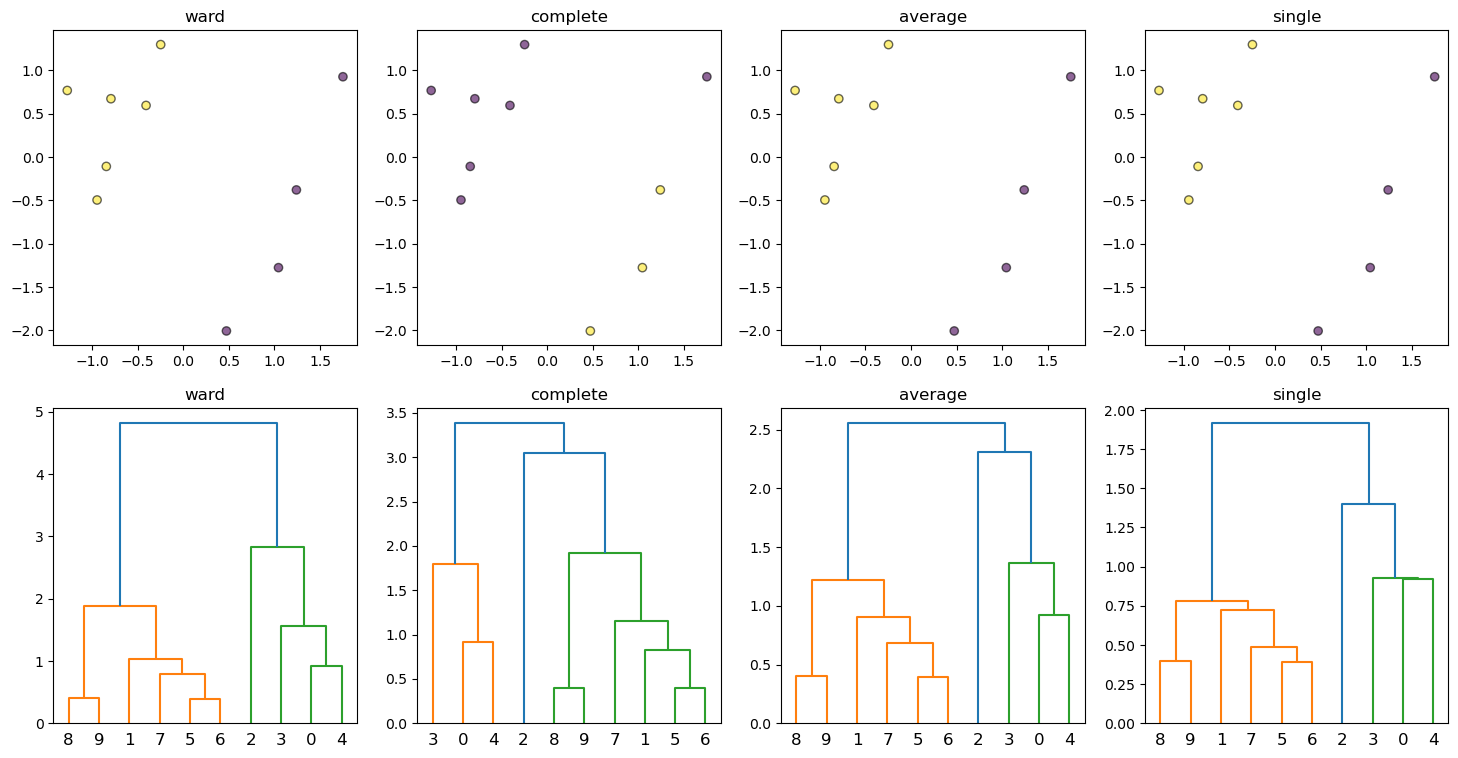

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

#transform: (x-u)/std.
X_train_std = sc.transform(X_train)

np.round(np.mean(X_train_std,axis=0),2)

compare_linkage(X_train_std)

In [48]:
from sklearn.datasets import make_circles
# make a synthetic dataset (circle) #array of shape [n_samples, 2]
X, y = make_circles(n_samples=100, shuffle=True,factor=0.5, random_state=0, noise=0.05) 

In [168]:
print(X[:10])
print(y[:10])

[[-0.97084503 -0.12673179]
 [-0.01989117 -0.45880462]
 [ 0.95036645  0.21475102]
 [ 0.3868271   0.25685525]
 [-0.53375109 -0.00663921]
 [ 0.34970205 -0.2956982 ]
 [-0.41722927  0.81854348]
 [-0.47625865  0.08139568]
 [ 0.42783229  0.26529816]
 [ 0.36259195 -0.27483444]]
[0 1 0 1 1 1 0 1 1 1]


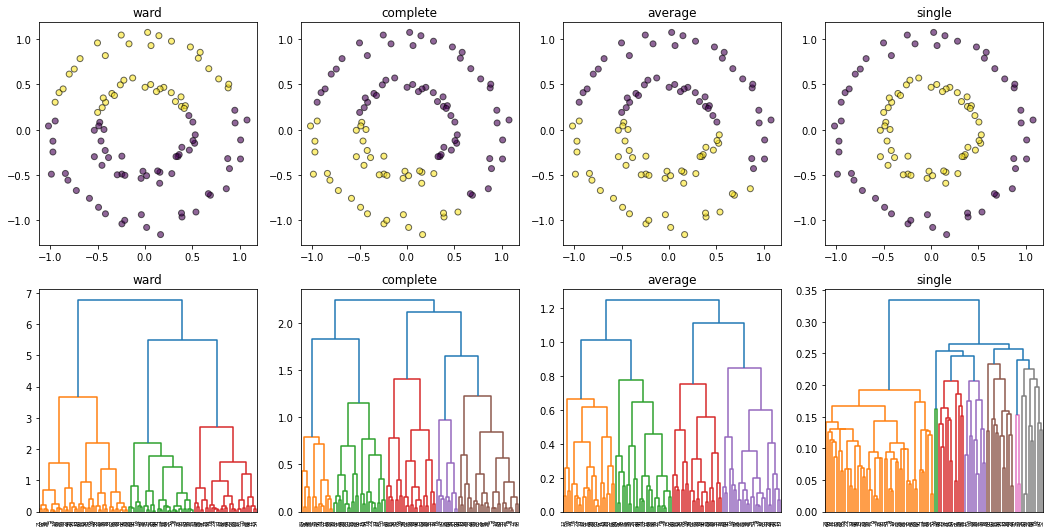

In [166]:
compare_linkage(X)